In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from utils import generate_random_sales
import os

# cree fichies data if not exist
if not os.path.exists('data'):
    os.makedirs('data')

In [3]:
# import les dates 
dates = pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS')

# Ventes aléatoires de chaque produit
sales_A = generate_random_sales(50, 100, 12)   # produit A
sales_B = generate_random_sales(30, 80, 12)    # produit B  
sales_C = generate_random_sales(20, 60, 12)    # produit C
sales_D = generate_random_sales(10, 50, 12)    # produit D

# cree DataFrame premier 
df_initial = pd.DataFrame({
    'Date': dates,
    'Product_A': sales_A,
    'Product_B': sales_B,
    'Product_C': sales_C,
    'Product_D': sales_D
})

# save  initial.csv
df_initial.to_csv('data/initial.csv', index=False)
print("✅ the initial.csv save on  data")
print(df_initial)
print(df_initial.head())

✅ the initial.csv save on  data
         Date  Product_A  Product_B  Product_C  Product_D
0  2025-01-01         68         70         23         13
1  2025-02-01         61         73         26         34
2  2025-03-01         62         66         20         26
3  2025-04-01         54         31         21         28
4  2025-05-01         73         54         21         39
5  2025-06-01         69         40         35         30
6  2025-07-01         88         46         48         40
7  2025-08-01         64         65         55         32
8  2025-09-01         50         30         55         26
9  2025-10-01         97         80         31         42
10 2025-11-01         77         42         34         18
11 2025-12-01         58         42         55         33
        Date  Product_A  Product_B  Product_C  Product_D
0 2025-01-01         68         70         23         13
1 2025-02-01         61         73         26         34
2 2025-03-01         62         66         

In [4]:
# Copier les données et ajouter les métriques
df_final = df_initial.copy()
df_final = df_final.rename(columns={'Date': 'Month'})

# Liste des noms de produits
product_columns = ['Product_A', 'Product_B', 'Product_C', 'Product_D']

# Calcul des métriques de base
df_final['Total_Sales'] = df_final[product_columns].sum(axis=1)
df_final['Average_Sales'] = df_final[product_columns].mean(axis=1)
df_final['Month_over_Month_Growth'] = df_final['Total_Sales'].pct_change() * 100

# Fonction pour déterminer le trimestre
def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

# Ajouter la colonne Quarter
df_final['Quarter'] = df_final['Month'].dt.month.apply(get_quarter)

# Ajouter les produits avec ventes max et min
df_final['Max_Sales_Product'] = df_final[product_columns].idxmax(axis=1)
df_final['Min_Sales_Product'] = df_final[product_columns].idxmin(axis=1)

# Sauvegarder en tant que final.csv
df_final.to_csv('data/final.csv', index=False)
print("✅ Fichier final.csv sauvegardé dans le dossier data")
print("\nAffichage des 5 premières lignes des données:")
print(df_final.head())

✅ Fichier final.csv sauvegardé dans le dossier data

Affichage des 5 premières lignes des données:
       Month  Product_A  Product_B  Product_C  Product_D  Total_Sales  \
0 2025-01-01         68         70         23         13          174   
1 2025-02-01         61         73         26         34          194   
2 2025-03-01         62         66         20         26          174   
3 2025-04-01         54         31         21         28          134   
4 2025-05-01         73         54         21         39          187   

   Average_Sales  Month_over_Month_Growth Quarter Max_Sales_Product  \
0          43.50                      NaN      Q1         Product_B   
1          48.50                11.494253      Q1         Product_B   
2          43.50               -10.309278      Q1         Product_B   
3          33.50               -22.988506      Q2         Product_A   
4          46.75                39.552239      Q2         Product_A   

  Min_Sales_Product  
0         Pro

In [5]:
# Tableau croisé dynamique pour les moyennes
pivot_avg = df_final.groupby('Quarter')[product_columns + ['Total_Sales']].mean().round(2)

# Tableau croisé dynamique pour les totaux
pivot_total = df_final.groupby('Quarter')['Total_Sales'].sum()

# Sauvegarder les résultats dans output.csv
with open('data/output.csv', 'w', encoding='utf-8') as f:
    f.write("Moyenne des ventes par trimestre (Average Sales Per Quarter)\n")
    pivot_avg.to_csv(f)
    f.write("\nTotal des ventes par trimestre (Total Sales Per Quarter)\n")
    pivot_total.to_csv(f)

print("✅ Fichier output.csv sauvegardé dans le dossier data")
print("\nMoyenne des ventes par trimestre:")
print(pivot_avg)
print("\nTotal des ventes par trimestre:")
print(pivot_total)

✅ Fichier output.csv sauvegardé dans le dossier data

Moyenne des ventes par trimestre:
         Product_A  Product_B  Product_C  Product_D  Total_Sales
Quarter                                                         
Q1           63.67      69.67      23.00      24.33       180.67
Q2           65.33      41.67      25.67      32.33       165.00
Q3           67.33      47.00      52.67      32.67       199.67
Q4           77.33      54.67      40.00      31.00       203.00

Total des ventes par trimestre:
Quarter
Q1    542
Q2    495
Q3    599
Q4    609
Name: Total_Sales, dtype: int64


In [6]:
# Meilleur mois
best_month_idx = df_final['Total_Sales'].idxmax()
best_month = df_final.loc[best_month_idx, 'Month']
best_month_sales = df_final.loc[best_month_idx, 'Total_Sales']

# Meilleur produit
annual_sales = df_final[product_columns].sum()
best_product = annual_sales.idxmax()
best_product_sales = annual_sales.max()

# Meilleur trimestre
best_quarter = pivot_total.idxmax()
best_quarter_sales = pivot_total.max()

print("🎯 Informations principales (Key Insights):")
print("=" * 50)
print(f"Meilleur mois: {best_month.strftime('%B %Y')} - {best_month_sales} ventes")
print(f"Meilleur produit: {best_product} - {best_product_sales} ventes annuelles")
print(f"Meilleur trimestre: {best_quarter} - {best_quarter_sales} ventes")
print(f"\nVentes annuelles par produit:")
for product, sales in annual_sales.items():
    print(f"  - {product}: {sales} ventes")

🎯 Informations principales (Key Insights):
Meilleur mois: October 2025 - 250 ventes
Meilleur produit: Product_A - 821 ventes annuelles
Meilleur trimestre: Q4 - 609 ventes

Ventes annuelles par produit:
  - Product_A: 821 ventes
  - Product_B: 639 ventes
  - Product_C: 424 ventes
  - Product_D: 361 ventes


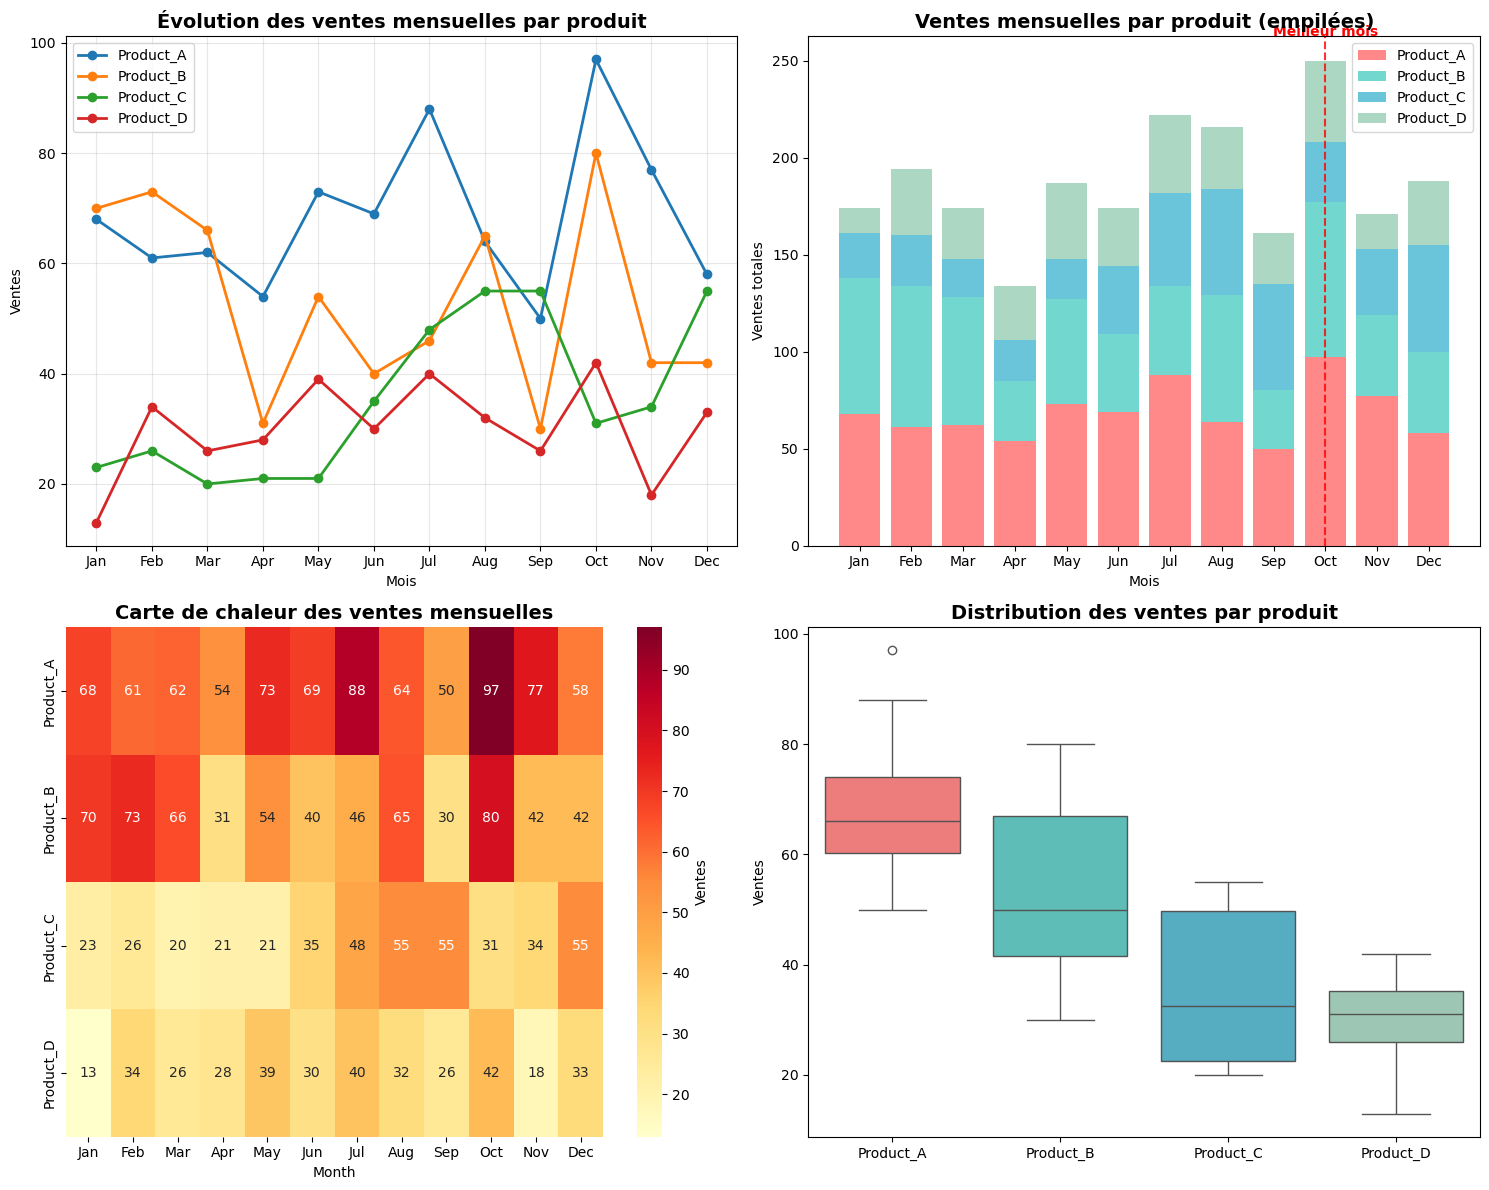

✅ Graphiques sauvegardés dans sales_analysis.png


In [7]:
# Configuration des graphiques
plt.figure(figsize=(15, 12))

# 1. Graphique en lignes
plt.subplot(2, 2, 1)
for product in product_columns:
    plt.plot(df_final['Month'].dt.strftime('%b'), df_final[product], marker='o', label=product, linewidth=2)
plt.title('Évolution des ventes mensuelles par produit', fontsize=14, fontweight='bold')
plt.xlabel('Mois')
plt.ylabel('Ventes')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Graphique à barres empilées
plt.subplot(2, 2, 2)
bottom = np.zeros(12)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
for i, product in enumerate(product_columns):
    plt.bar(df_final['Month'].dt.strftime('%b'), df_final[product], bottom=bottom, 
            label=product, color=colors[i], alpha=0.8)
    bottom += df_final[product].values

# Identifier le meilleur mois
plt.axvline(x=best_month_idx, color='red', linestyle='--', alpha=0.8)
plt.text(best_month_idx, best_month_sales * 1.05, 'Meilleur mois', 
         ha='center', color='red', fontweight='bold')

plt.title('Ventes mensuelles par produit (empilées)', fontsize=14, fontweight='bold')
plt.xlabel('Mois')
plt.ylabel('Ventes totales')
plt.legend()

# 3. Carte de chaleur
plt.subplot(2, 2, 3)
heatmap_data = df_final[product_columns].T
heatmap_data.columns = df_final['Month'].dt.strftime('%b')
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Ventes'})
plt.title('Carte de chaleur des ventes mensuelles', fontsize=14, fontweight='bold')

# 4. Diagramme en boîte
plt.subplot(2, 2, 4)
sns.boxplot(data=df_final[product_columns], palette=colors)
plt.title('Distribution des ventes par produit', fontsize=14, fontweight='bold')
plt.ylabel('Ventes')

plt.tight_layout()
plt.savefig('sales_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Graphiques sauvegardés dans sales_analysis.png")

In [8]:
print(" Questions finales et conclusions :)")
print("=" * 50)

# Question 1 : Quel produit contribue le plus ?
contribution = (annual_sales / annual_sales.sum() * 100).round(1)
print("\n1. Quel produit contribue le plus aux ventes annuelles ?")
for product, percent in contribution.items():
    print(f"   - {product}: {percent}%")
print(f"   → Réponse : {best_product} contribue à hauteur de {contribution[best_product]}%")

# Question 2 : Pourquoi ce trimestre est-il le meilleur ?
print(f"\n2. Pourquoi le trimestre {best_quarter} est-il le meilleur ?")
quarter_data = df_final[df_final['Quarter'] == best_quarter]
best_product_in_quarter = quarter_data[product_columns].sum().idxmax()
print(f"   - Total des ventes : {best_quarter_sales}")
print(f"   - Produit dominant : {best_product_in_quarter}")
print(f"   - Croissance moyenne : {quarter_data['Month_over_Month_Growth'].mean():.1f}%")

# Question 3 : Comment améliorer la stratégie ?
print(f"\n3. Comment améliorer la stratégie pour l'année prochaine ?")
print(f"   - Se concentrer sur {best_product} durant le trimestre {best_quarter}")
print(f"   - Analyser les raisons du succès de {best_month.strftime('%B')}")
print(f"   - Améliorer les performances des produits faibles dans les trimestres bas")
print(f"   - Profiter de la croissance mensuelle moyenne : {df_final['Month_over_Month_Growth'].mean():.1f}%")


 Questions finales et conclusions :)

1. Quel produit contribue le plus aux ventes annuelles ?
   - Product_A: 36.6%
   - Product_B: 28.5%
   - Product_C: 18.9%
   - Product_D: 16.1%
   → Réponse : Product_A contribue à hauteur de 36.6%

2. Pourquoi le trimestre Q4 est-il le meilleur ?
   - Total des ventes : 609
   - Produit dominant : Product_A
   - Croissance moyenne : 11.2%

3. Comment améliorer la stratégie pour l'année prochaine ?
   - Se concentrer sur Product_A durant le trimestre Q4
   - Analyser les raisons du succès de October
   - Améliorer les performances des produits faibles dans les trimestres bas
   - Profiter de la croissance mensuelle moyenne : 4.0%
